In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



<h1 style="background:navy; color:white; font-size:28px; height : 50px; text-align:center; vertical-align:center">Reading the Data</h1>


In [2]:
#reading and saving the data in memory
df_raw = pd.read_csv("cr_loan2.csv")

In [3]:
#how the data looks, what informations includes

df_raw.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<div style="color:black; font-size:21px; vertical-align:center; text-align:center;">
    <h3>There are total  : 32581 Entries</h3>
  <ul style ='text-align:left'>
    <li>Each  each entry (Person)  has  12 creterica  </li>
      <li><bold>Categorical Data</bold> : Home ownershit(Rent, Morgage, Other),Loan intention </li>
      <li><bold>Numerical Data : </bold>Age, Income, emploment length ,Loan amount, Loan interest Rate, Loan -Income Ratio,Credit History</li>
  </ul>

</div>




<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center; vertical-align:center">What is the Loan Status Distribution</h1>

<h5 >How many / What percent of applicaants  are default </h5>

<Figure size 1296x720 with 0 Axes>

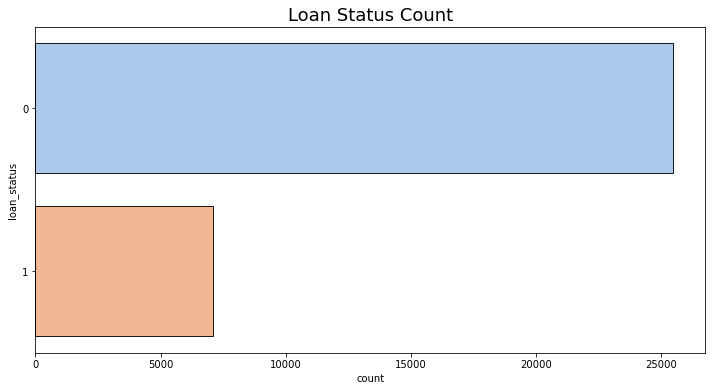

Ratio : loan_status
0    78.18
1    21.82
dtype: float64


In [5]:

plt.figure(figsize=(18,10))
fig, axes = plt.subplots(1,1, figsize=(12,6))

sns.countplot(y ="loan_status", data = df_raw, palette="pastel",edgecolor=".1")
plt.title("Loan Status Count", size = 18)


plt.show()


print("Ratio :",np.round((df_raw.value_counts("loan_status") / len(df_raw) * 100),2))

In [6]:
# will be removing max income to better show the graph below , (to scale better)

max_income = df_raw['person_income'].max()

indeces = df_raw[df_raw['person_income'] == max_income].index

print(indeces)
df = df_raw.drop(indeces)

Int64Index([32297], dtype='int64')


<h3>What is the relation between <span style="color:navy;">LOAN STATUS</span>, and<span style="color:navy;"> PERSON INCOME ?</span></h3>

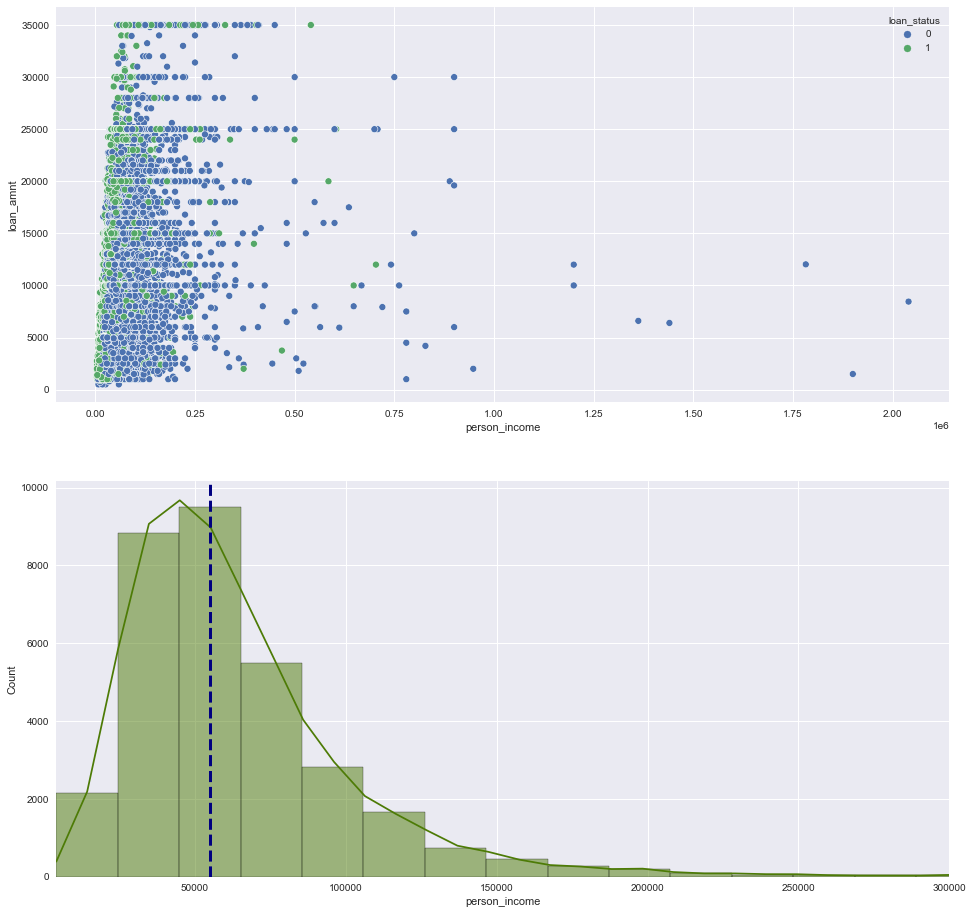

median 55000.0


In [7]:
plt.style.use("seaborn")
fig, ax  = plt.subplots(2,1,figsize=(16,16))


sns.scatterplot(x ='person_income', y ='loan_amnt', hue ='loan_status', data = df , ax = ax[0])


sns.histplot(x ='person_income', data = df , ax =ax[1], color='#4D7B06', kde=True , bins =100)
median_income = df['person_income'].median()
ax[1].set_xlim(df['person_income'].min(), 300000)
ax[1].axvline(median_income, ls='--' , color ="navy", linewidth =3)


plt.show()

print("median", median_income)

<h3 style="background:navy; color:white; font-size:28px; height : 50px; text-align:center; vertical-align:center">Null entries in the dataset?</h3>

In [8]:
# What are the columsn has null values

df.columns[df.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

<AxesSubplot:>

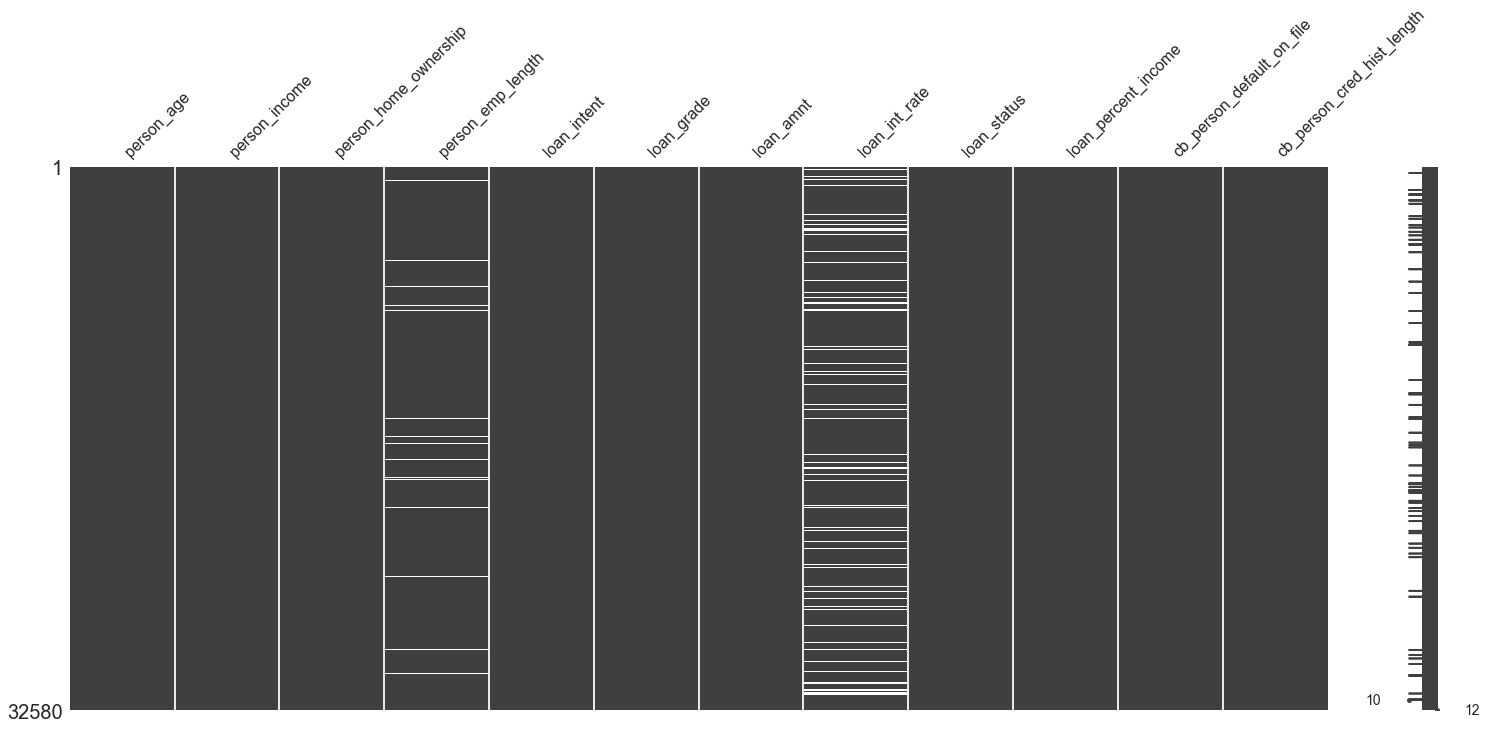

In [9]:
import missingno

missingno.matrix(df)


In [10]:
df[['person_emp_length', 'loan_int_rate']].isnull().sum() 

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [11]:
# fill the null values with average interest rate

df['loan_int_rate'].fillna((df['loan_int_rate'].mean()), inplace = True)

df['loan_int_rate'].fillna((df['loan_int_rate'].mean()), inplace = True)

indeces = df[df['person_emp_length'].isnull()].index
df.drop(indeces, inplace=True)

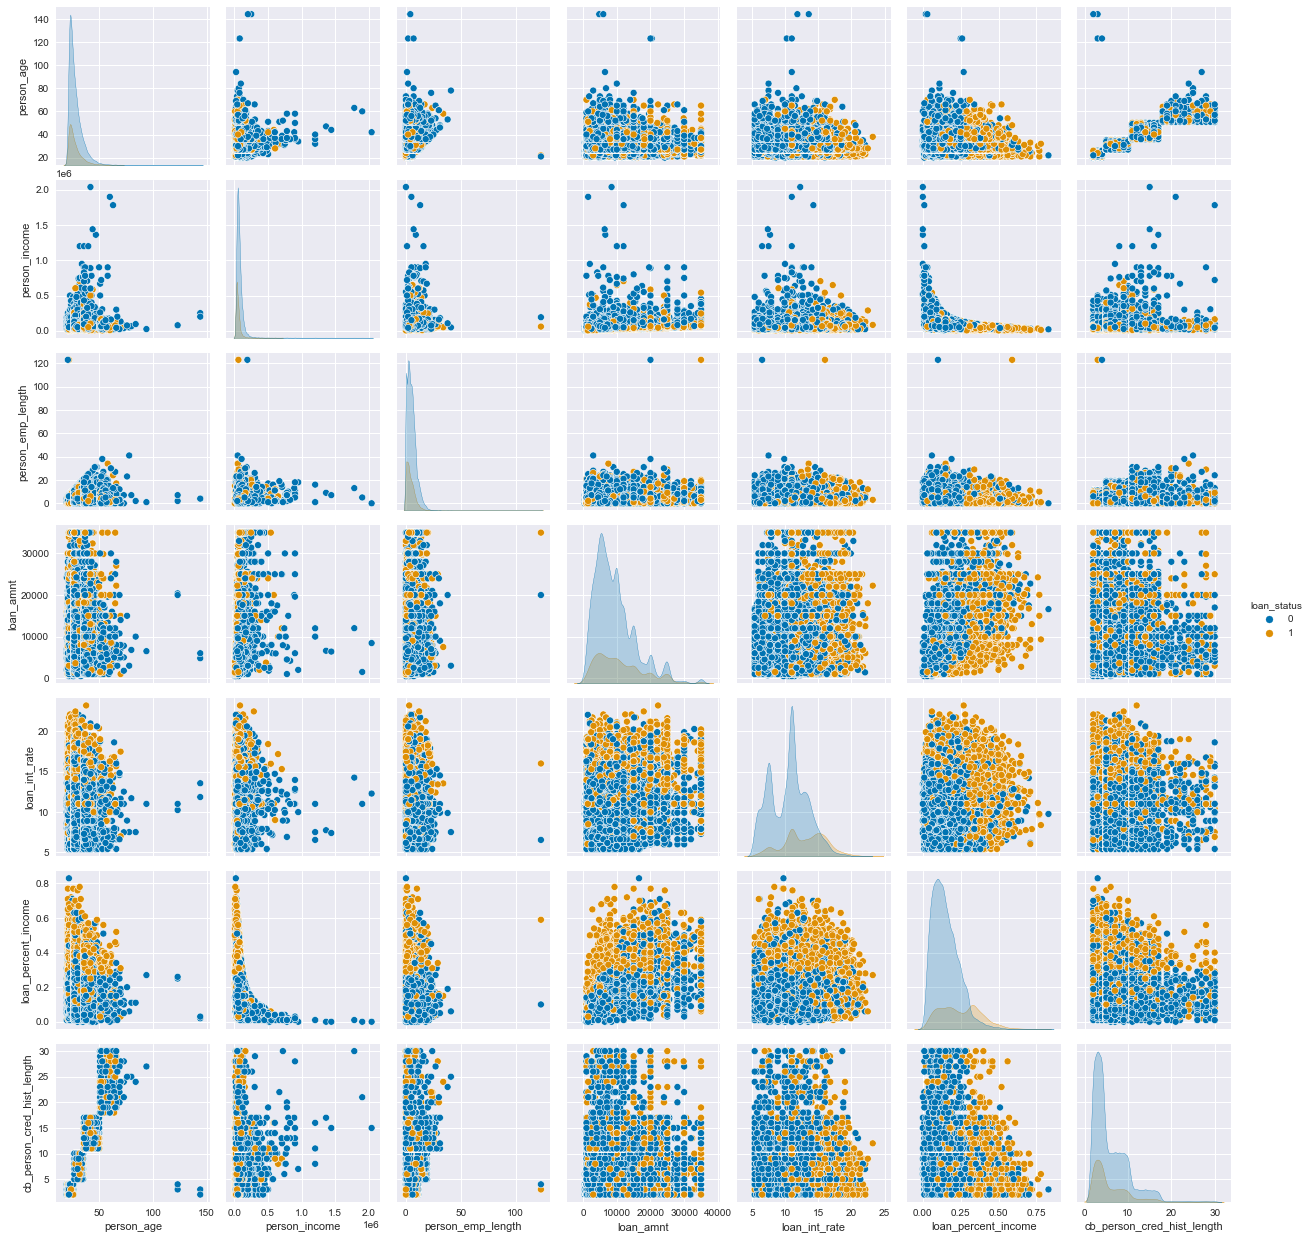

In [12]:
sns.pairplot(df, hue ='loan_status', palette ="colorblind")

In [13]:
def remove_outliner(df, col_name , cutoff =1.5):
    
    q25, q75 = np.percentile(df[col_name], 25), np.percentile(df[col_name], 75)
    iqr = q75 - q25
    
    cut_off = iqr * cutoff
    lower , upper = q25 - cut_off , q75 + cut_off
    
    outliner_indeces  = df[(df[col_name] < lower) | (df[col_name] > upper)].index
    print("there are total {} outliner will be removed".format(len(outliner_indeces)))
    
    df = df.drop(outliner_indeces)
    
    return df
    
    


<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center">Outliners </h1>

In [14]:
#remove outliners  

loan_status_0 = df[df["loan_status"] == 0]
loan_status_1 = df[df["loan_status"] == 1]


for col in df.select_dtypes(include=["number"]).columns :
    loan_status_0 = remove_outliner(loan_status_0, col, cutoff =1.5)
    loan_status_1 = remove_outliner(loan_status_1, col, cutoff =2)
    

there are total 1154 outliner will be removed
there are total 165 outliner will be removed
there are total 1075 outliner will be removed
there are total 214 outliner will be removed
there are total 517 outliner will be removed
there are total 59 outliner will be removed
there are total 752 outliner will be removed
there are total 0 outliner will be removed
there are total 21 outliner will be removed
there are total 0 outliner will be removed
there are total 0 outliner will be removed
there are total 0 outliner will be removed
there are total 255 outliner will be removed
there are total 4 outliner will be removed
there are total 688 outliner will be removed
there are total 132 outliner will be removed


In [15]:
df = pd.concat([loan_status_0,loan_status_1])


categorical_columns = df.select_dtypes(exclude=["number"]).columns
categorical_columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [16]:
df[categorical_columns].head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,OWN,EDUCATION,B,N
23,OWN,PERSONAL,A,N
27,OWN,PERSONAL,A,N
59,OWN,VENTURE,E,Y
65,MORTGAGE,EDUCATION,D,Y


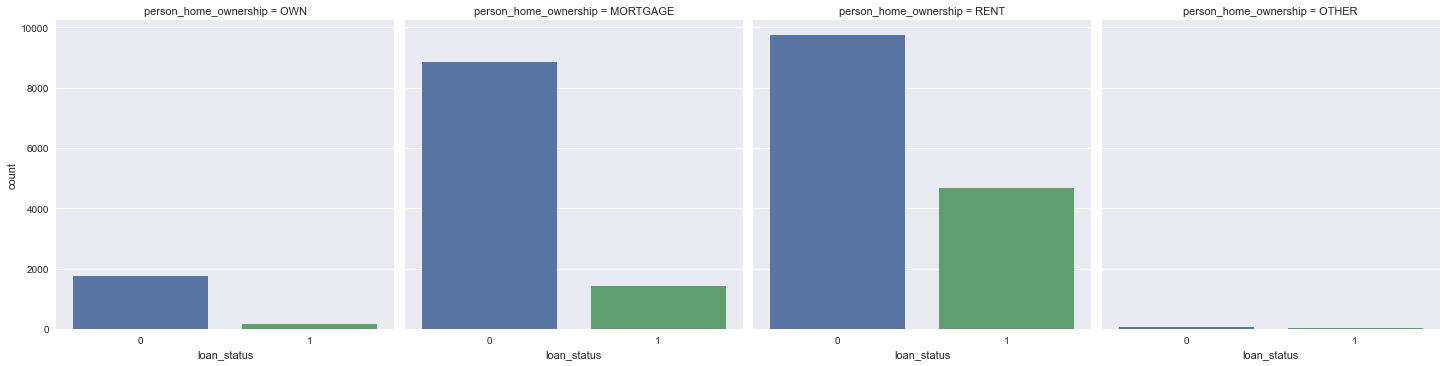

In [17]:
sns.catplot(x = 'loan_status' , data= df , col ='person_home_ownership', kind='count')

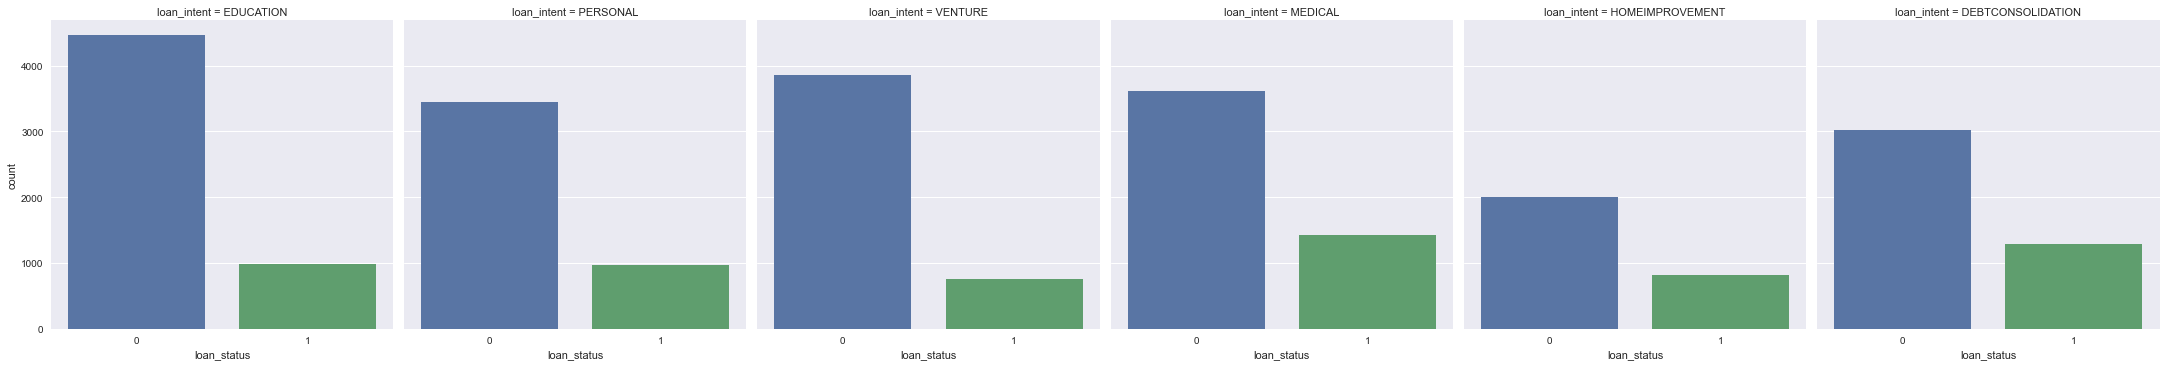

In [18]:
sns.catplot(x = 'loan_status' , data= df , col ='loan_intent', kind='count')

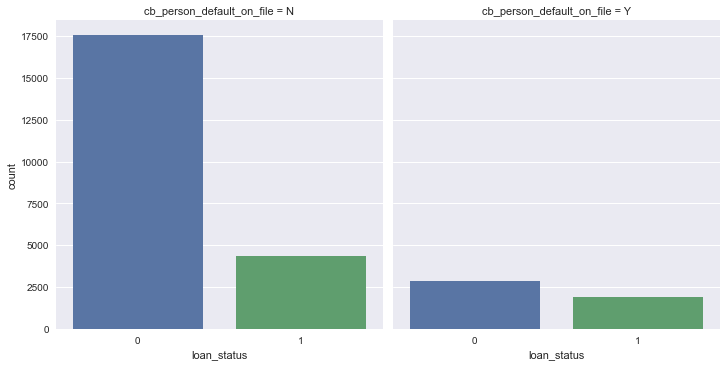

In [19]:
sns.catplot(x = 'loan_status' , data= df , col ='cb_person_default_on_file', kind='count')

In [20]:
# There is no trend for all cases. , non_default > default 

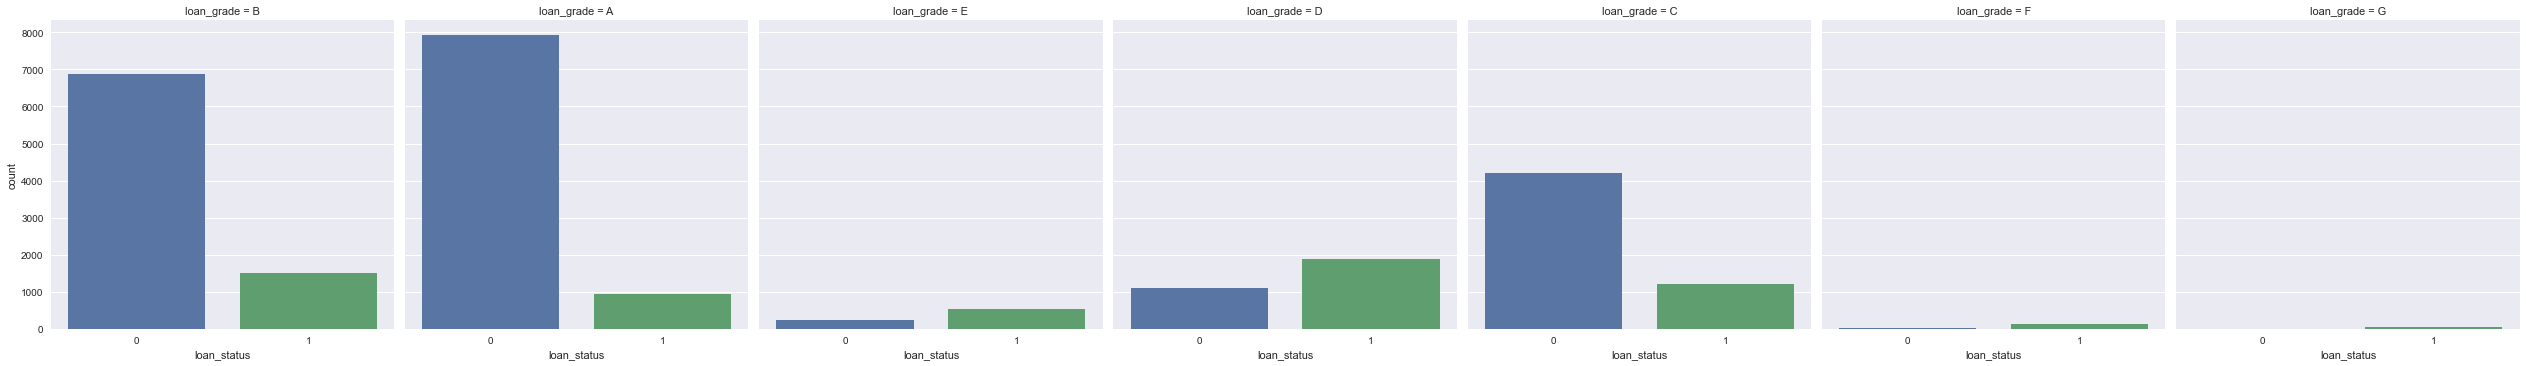

In [21]:
sns.catplot(x = 'loan_status' , data= df , col ='loan_grade', kind='count')

In [22]:
df = pd.get_dummies(df)

In [23]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,...,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000,26649.000000
mean,26.287290,58115.247214,4.364629,8812.606477,11.008329,0.234605,0.168824,4.897257,0.384480,0.003377,...,0.173215,0.332470,0.314721,0.203497,0.111899,0.029082,0.006229,0.002101,0.821757,0.178243
std,4.125046,27003.948861,3.404473,5374.487554,3.062000,0.423760,0.102544,2.805412,0.486481,0.058017,...,0.378440,0.471107,0.464413,0.402607,0.315248,0.168039,0.078680,0.045794,0.382724,0.382724
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,38000.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,25.000000,54000.000000,4.000000,8000.000000,11.011637,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,29.000000,74000.000000,7.000000,12000.000000,13.160000,0.000000,0.230000,7.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,44.000000,149000.000000,16.000000,35000.000000,23.220000,1.000000,0.720000,15.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center">Transformation </h1>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()

income_values = df['person_income'].values.reshape(-1,1)

df["person_income"] =np.array(scaler.fit_transform(income_values))

laon_amount_values = df['loan_amnt'].values.reshape(-1,1)

df["loan_amnt"] =np.array(scaler.fit_transform(laon_amount_values))





In [25]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,0.038621,5.0,0.014493,11.140000,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
23,24,0.048138,0.0,0.028986,7.290000,0,0.14,3,0,0,...,0,1,0,0,0,0,0,0,1,0
27,23,0.048276,0.0,0.026087,9.320000,0,0.13,3,0,0,...,0,1,0,0,0,0,0,0,1,0
59,24,0.055172,2.0,0.036232,11.011637,0,0.15,3,0,0,...,1,0,0,0,0,1,0,0,0,1
65,22,0.055172,7.0,0.028986,14.840000,0,0.13,3,1,0,...,0,0,0,0,1,0,0,0,0,1


<h2>Feature Selction</h2>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif



numeric_columns = list(df.select_dtypes(include="number"))

if "loan_status" in numeric_columns:
    numeric_columns.remove("loan_status")

X = df[numeric_columns]
y = df["loan_status"]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





selector = SelectKBest(f_classif, k =7)
selector.fit_transform(X_train, y_train)



print(X_train.columns[selector.get_support(indices=True)][:5])



Index(['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'person_home_ownership_RENT'],
      dtype='object')


In [27]:
linear_model =LogisticRegression().fit(X_train, y_train)


feature_names = pd.DataFrame({"columns" : X_train.columns , "values":linear_model.coef_[0]}).sort_values("values", ascending= False)

print(feature_names.head(5))



                columns    values
5   loan_percent_income  5.898055
3             loan_amnt  2.927688
22         loan_grade_F  1.071728
21         loan_grade_E  0.919020
20         loan_grade_D  0.672006


/Users/ilkersenturk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[18:05:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/ilkersenturk/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

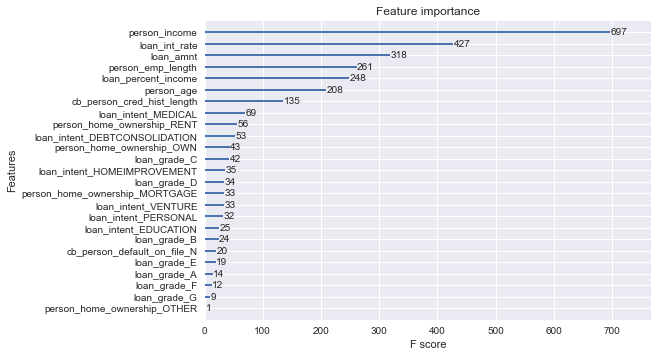

In [28]:
from xgboost import XGBClassifier
from xgboost import plot_importance

xgboost_model = XGBClassifier().fit(X_train, y_train)

plot_importance(xgboost_model)

<AxesSubplot:>

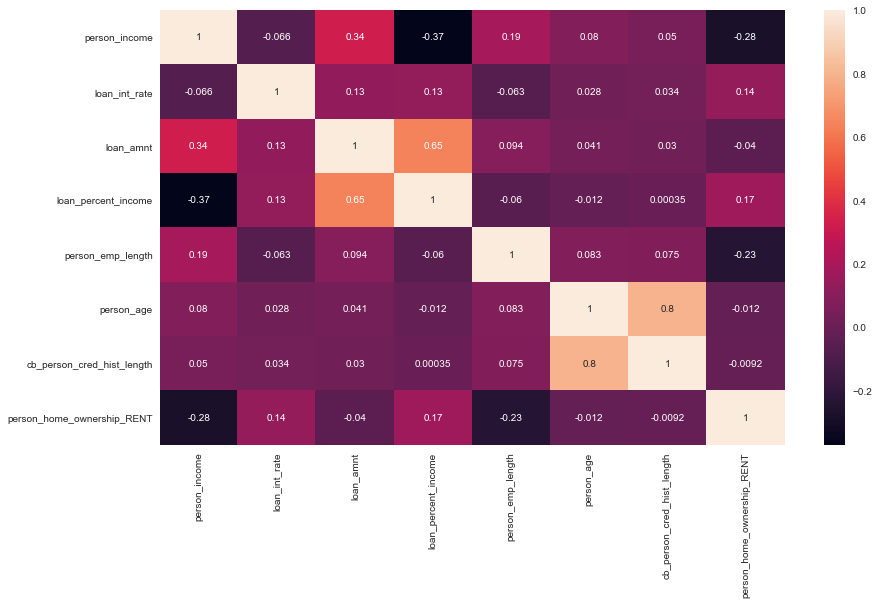

In [29]:
features =["person_income","loan_int_rate","loan_amnt","loan_percent_income","person_emp_length","person_age","cb_person_cred_hist_length","person_home_ownership_RENT"]

plt.figure(figsize=(14,8))
sns.heatmap(df[features].corr(), annot=True)

In [30]:

X = df[features]
y =df['loan_status']

<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center">Parameter Update </h1>

In [31]:
# model selecting
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


classifiers = {
    "log": LogisticRegression(),
    #"knn": KNeighborsClassifier(),
    #"svc": SVC(),
    "rff": RandomForestClassifier()
}
params = {
    "log" : {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1,5, 10, 100, 1000]},
    #"knn" : {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    #"svc" :   {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
    "rff" : {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}
}

best_params = {
    "log" : 0,
    #"knn" : 0,
    #"svc" : 0,
    "rff" : 0 
}

for key  in classifiers.keys():
    model = RandomizedSearchCV(classifiers[key] , params[key], n_iter=5,n_jobs=-1)
    model.fit(X_train,y_train)
    best_params[key] = model.best_params_

In [32]:
best_params

{'log': {'penalty': 'l2', 'C': 10},
 'rff': {'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'gini'}}

<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center"> Logistic Regression Classification Model </h1>

In [33]:
from sklearn.metrics import classification_report

model_log = LogisticRegression(penalty='l2',C=10)

model_log.fit(X_train,y_train)

y_pred = model_log.predict(X_test)
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.89      0.95      0.92      4106
     Default       0.79      0.59      0.67      1224

    accuracy                           0.87      5330
   macro avg       0.84      0.77      0.80      5330
weighted avg       0.86      0.87      0.86      5330



0.8688555347091933


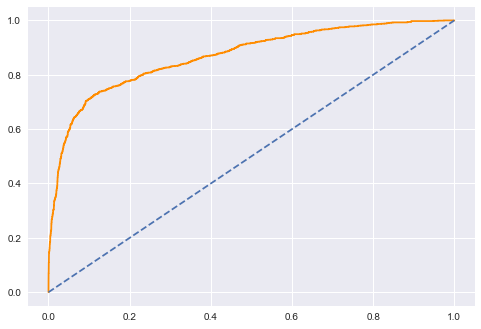

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score


# Create predictions and store them in a variable
log_preds = model_log.predict_proba(X_test)
# Print the accuracy score the model
print(model_log.score(X_test, y_test))
# Plot the ROC curve of the probabilities of default
log_default_prob = log_preds[:, 1]
log_fallout, log_sensitivity, log_thresholds = roc_curve(y_test, log_default_prob)
plt.plot(log_fallout, log_sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, log_default_prob)

<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center">Random Forest Tree Classification Model</h1>

In [35]:
model_rff = RandomForestClassifier(min_samples_leaf=5 , max_depth=3, criterion='gini')
model_rff.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5)

In [36]:
y__train_pred = model_rff.predict(X_train)
target_names = ['Non-Default', 'Default']
print(classification_report(y_train, y__train_pred,target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.85      1.00      0.92     16291
     Default       0.98      0.45      0.62      5028

    accuracy                           0.87     21319
   macro avg       0.92      0.72      0.77     21319
weighted avg       0.88      0.87      0.85     21319



In [37]:
y_pred = model_rff.predict(X_test)
target_names = ['Non Default', 'Default']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Non Default       0.85      1.00      0.92      4106
     Default       0.97      0.41      0.58      1224

    accuracy                           0.86      5330
   macro avg       0.91      0.70      0.75      5330
weighted avg       0.88      0.86      0.84      5330



0.8619136960600375


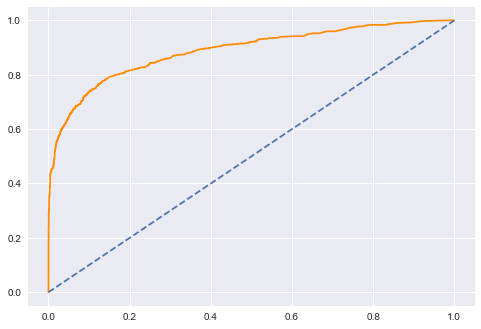

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create predictions and store them in a variable
rff_preds = model_rff.predict_proba(X_test)

# Print the accuracy score the model
print(model_rff.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
rff_default_prob = rff_preds[:, 1]
rff_fallout, rff_sensitivity, rff_thresholds = roc_curve(y_test, rff_default_prob)
plt.plot(rff_fallout, rff_sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, rff_default_prob)

<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center">XGboost Classification </h1>

In [39]:
import xgboost as xgb

# parameter Update
n_folds = 20
early_stop = 5
params = { 'objective': "binary:logistic",
          'seed' : 99, 'eval_metric':"auc" }

DTrain = xgb.DMatrix(X_train, label = y_train)
cv =xgb.cv(params, DTrain, num_boost_round=25, nfold = n_folds, early_stopping_rounds = early_stop, shuffle = True)

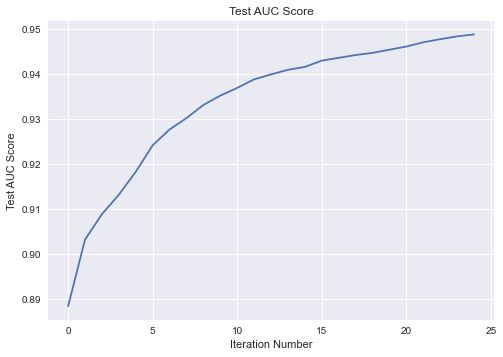

In [40]:
# Plot the test AUC scores for each iteration
plt.plot(cv['test-auc-mean'])
plt.title('Test AUC Score')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score
model_xg = xgb.XGBClassifier(learning_rate = 0.4, max_depth = 10)
cv_scores =cross_val_score(model_xg, X_train, y_train, cv=5)

[18:05:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [42]:
#Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Average accuracy: 0.94 (+/- 0.01)


In [43]:
# How the model perfom on Training Data
model_xg.fit(X_train, y_train)
y_train_pred = model_xg.predict(X_train)

print(classification_report(y_train, y_train_pred,target_names=target_names))


[18:05:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

 Non Default       1.00      1.00      1.00     16291
     Default       1.00      0.99      1.00      5028

    accuracy                           1.00     21319
   macro avg       1.00      1.00      1.00     21319
weighted avg       1.00      1.00      1.00     21319



In [44]:
# How the model perfom on Test Data
y_pred = model_xg.predict(X_test)
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Non Default       0.94      0.99      0.96      4106
     Default       0.95      0.77      0.85      1224

    accuracy                           0.94      5330
   macro avg       0.94      0.88      0.91      5330
weighted avg       0.94      0.94      0.94      5330



<p style=style="background:navy; color:white; font-size:18px; height : 50px; vertical_align:center">Overall models performance is hight on Training and little less in Test data , and scores are 0.65, ,0.70, and 0.76</p>

# Voting Classifier 

[18:05:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

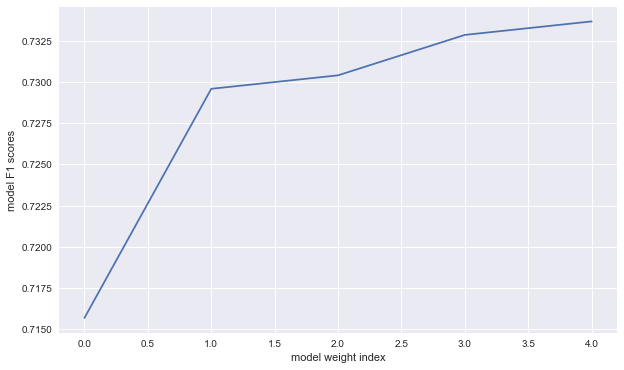

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_recall_fscore_support

weights = [[0.3,0.3,0.4],[0.25,0.3,0.45],[0.3,0.25,0.45],[0.3,0.25,0.50],[0.26,0.25,0.49]]
model_scores =[ ]
for weight in weights:
    model = VotingClassifier(estimators=[('log', model_log), ('rff', model_rff), ('xg', model_xg)],
                             weights = weight,voting='soft')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_score = precision_recall_fscore_support(y_test,y_pred)
    model_scores.append(model_score[1][1])


plt.figure(figsize=(10,6))   
plt.plot(model_scores)

plt.xlabel("model weight index")
plt.ylabel("model F1 scores")
plt.show()

In [46]:
model_vote_soft = VotingClassifier(estimators=[('log', model_log), ('rff', model_rff), ('xg', model_xg)],
                             weights = weights[4],voting='soft')

model_vote_soft.fit(X_train,y_train)

[18:05:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('log', LogisticRegression(C=10)),
                             ('rff',
                              RandomForestClassifier(max_depth=3,
                                                     min_samples_leaf=5)),
                             ('xg',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.4, max_delta_step=0,
                                            max_depth=10, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
    

In [47]:
y_train_pred = model_vote_soft.predict(X_train)
print(classification_report(y_train, y_train_pred,target_names=target_names))


              precision    recall  f1-score   support

 Non Default       0.96      1.00      0.98     16291
     Default       1.00      0.87      0.93      5028

    accuracy                           0.97     21319
   macro avg       0.98      0.93      0.95     21319
weighted avg       0.97      0.97      0.97     21319



In [48]:
y_pred = model_vote_soft.predict(X_test)
print(classification_report(y_test, y_pred,target_names=target_names))


              precision    recall  f1-score   support

 Non Default       0.93      0.99      0.96      4106
     Default       0.97      0.73      0.84      1224

    accuracy                           0.93      5330
   macro avg       0.95      0.86      0.90      5330
weighted avg       0.94      0.93      0.93      5330



<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center">Threshold Updating </h1>

In [49]:
# XGBOOST PERFORMS BETTER I WILL BE USING XGBOOST 


pred_df =pd.DataFrame({"expected_y":y_test.ravel()}, index=X_test.index.values)


pred_df["probs"] = model_rff.predict_proba(X_test)[:,1]
pred_df["prediction"] =pred_df["probs"].apply(lambda x: 1 if x > 0.5 else 0)


# Set the threshold for defaults to 0.5


In [50]:
pred_df.sort_values("expected_y",ascending = False).head(15)

,expected_y,probs,prediction
15077,1,0.516971,1
16431,1,0.223953,0
292,1,0.278213,0
2360,1,0.258069,0
27702,1,0.215675,0
18053,1,0.669323,1
606,1,0.621485,1
18350,1,0.498706,0
7865,1,0.403265,0
13340,1,0.484448,0


In [51]:
default_recall = precision_recall_fscore_support(y_test,pred_df['prediction'])[1][1]
num_defaults = pred_df['prediction'].value_counts()[1]
avg_loan_amnt = df["loan_amnt"].mean()
# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

73.88156762470838


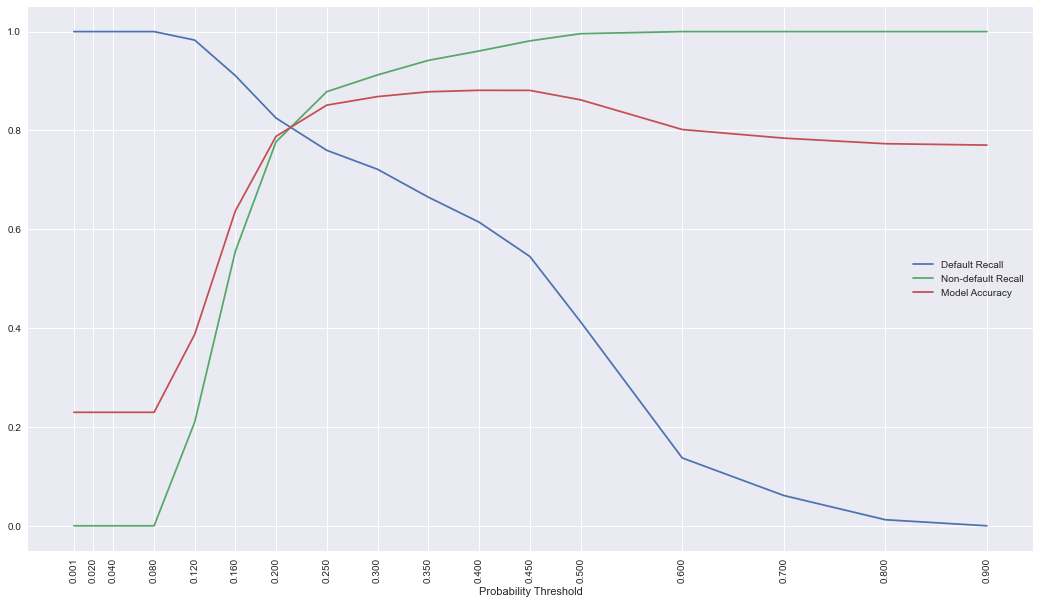

In [52]:
from sklearn.metrics import accuracy_score

thresholds = [0.001,0.02,0.04,0.08,0.12,0.16,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8,0.9]
def_recalls = []
nondef_recalls = []
accs = []
for i, thres in enumerate(thresholds):
    loan_status = pred_df["probs"].apply(lambda x: 1 if x > thres else 0)
    def_recalls.append(precision_recall_fscore_support(y_test,loan_status)[1][1])
    nondef_recalls.append(precision_recall_fscore_support(y_test,loan_status)[1][0])
    accs.append(accuracy_score(y_test,loan_status))


plt.figure(figsize =(18,10))
plt.plot(thresholds,def_recalls)
plt.plot(thresholds,nondef_recalls)
plt.plot(thresholds,accs)
plt.xticks(thresholds, rotation=90)
plt.xlabel("Probability Threshold")
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center">Model Calibration </h1>

In [53]:
default_percentage = (df_raw["loan_status"] == 1).sum() / len(df_raw)  * 100

print("There are {} % default in the dataset ".format(np.round(default_percentage,2)))

There are 21.82 % default in the dataset 


In [54]:
default_percentage_pred = (pred_df["prediction"] == 1).sum() / len(pred_df)  * 100

print("There are {} % default in the dataset ".format(np.round(default_percentage_pred,2)))

There are 9.79 % default in the dataset 


In [55]:
from sklearn.calibration import calibration_curve

prob_true,prob_pred =calibration_curve(y_test, pred_df['probs'], n_bins=3)


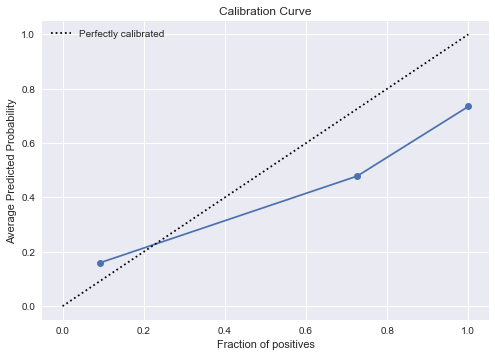

In [56]:
plt.plot(prob_true,prob_pred,marker ='o')
#plt.plot(pred_df['expected_y'], pred_df['prediction'])

# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.xlabel('Fraction of positives')
plt.ylabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

<h3>we expect to have 22 percent default but got 12 percent ,whic mean 10 percent of default labeled as non defualt, that mean loosing money for company  can we do better ?</h3>

In [57]:
pred_df["new_pred_04"] = pred_df["probs"].apply(lambda x: 1 if x > 0.4 else 0)

default_percentage_pred_04 = (pred_df["new_pred_04"] == 1).sum() / len(pred_df)  * 100

print("There are {} % default in the dataset ".format(np.round(default_percentage_pred_04,2)))

There are 17.13 % default in the dataset 


<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center"> Exeptance Rate.  Percentange </h1>

In [58]:
# instead of updating threshold, company strategy is to accept 90 percent of the applications, 

# What percent of the loan expect to accept

acceptance_percent = 0.85


#what thresshold hold represents the percents
thresholds = np.quantile(pred_df['probs'], acceptance_percent)

print(thresholds)

0.4332501710883366


In [59]:
pred_df["loan_status"] =  pred_df['probs'].apply(lambda x : 1 if x > thresholds else 0)

In [60]:
#Calculating Bad Rate  : # predicted (accepted default) default count / total loan  count

accepted_default = np.sum(pred_df["loan_status"] == 1)
total_loan = pred_df["loan_status"].count()

bad_rate = accepted_default / total_loan

print(bad_rate)

0.150093808630394


<h1 style=style="background:navy; color:white; font-size:28px; height : 50px; vertical_align:center; text-align:center"> Strategy Table </h1>

In [61]:
acceptance_rates= np.linspace(0.05,1,20)


thresholds = []
bad_rates = []

average_loan_amnt = []

for index, acceptance_rate in enumerate(acceptance_rates):
    # Calculate threshold
    threshold = np.quantile(pred_df['probs'], acceptance_rate)
    thresholds.append(threshold)
    # Calculate loan_status,  length , and loan default count
    loan_status =  pred_df['probs'].apply(lambda x : 1 if x > threshold else 0)
    # how many default in new load
    accepted_default = np.sum(loan_status == 1)
    # how many loans accepted total ?
    total_loan = len(loan_status)
    # Calculate bad rate
    bad_rate = accepted_default / total_loan
    bad_rates.append(bad_rate)
    


In [62]:
number_acceptance_loan = np.random.random_sample(20) * 10000


avg_laon_amnt = [X_test['loan_amnt'].mean()] * 20


In [63]:
strategy_table = pd.DataFrame(zip(acceptance_rates, thresholds, bad_rates,number_acceptance_loan,avg_laon_amnt),
                              
                              columns=["Acceptance Rate","Thresholds","Bad Rates","Num Accemptance Loans","avg_loan_amnt"])

In [64]:
strategy_table.sort_values("Acceptance Rate", ascending = False).head()

,Acceptance Rate,Thresholds,Bad Rates,Num Accemptance Loans,avg_loan_amnt
19,1.00,0.869966,0.000000,9084.197726,0.238597
18,0.95,0.562443,0.050094,5042.367089,0.238597
17,0.90,0.499408,0.098124,6856.929998,0.238597
16,0.85,0.433250,0.150094,9269.525621,0.238597
15,0.80,0.346479,0.200000,7745.765317,0.238597


In [65]:
strategy_table['estimated_Revenut'] = strategy_table["Num Accemptance Loans"] * strategy_table["avg_loan_amnt"] *(1 - strategy_table['Bad Rates'] * 2)

In [66]:
strategy_table

,Acceptance Rate,Thresholds,Bad Rates,Num Accemptance Loans,avg_loan_amnt,estimated_Revenut
0,0.05,0.103157,0.947280,2678.096995,0.238597,-571.611514
1,0.10,0.104867,0.899437,1155.806020,0.238597,-220.307371
2,0.15,0.109879,0.849906,8022.215911,0.238597,-1339.496545
3,0.20,0.126490,0.798124,7649.196695,0.238597,-1088.198546
4,0.25,0.129361,0.748218,3126.081231,0.238597,-370.278519
5,0.30,0.136029,0.699812,6139.088588,0.238597,-585.358492
6,0.35,0.138989,0.647655,4041.804661,0.238597,-284.785890
7,0.40,0.148505,0.599812,6141.441314,0.238597,-292.516490
8,0.45,0.160011,0.538649,1147.299124,0.238597,-21.159836
9,0.50,0.162268,0.499625,7341.877123,0.238597,1.314636
